In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

In [2]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 파일 경로를 지정합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv("corporation_investment.csv")

In [4]:
df.head()

,누적투자유치금액,기업추천수,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자
0,2.000000e+07,0,2.000000e+07,0,1,1,1,0,1,0,0.000000e+00,1
1,5.028000e+10,71,1.250000e+10,1,1,94,1,0,1,1,3.778000e+10,5
2,2.000000e+08,0,2.396568e+09,0,0,22,1,0,1,1,-2.196568e+09,1
3,2.300000e+08,1,2.300000e+08,0,0,1,0,1,1,1,0.000000e+00,2
4,1.200000e+09,2,1.200000e+09,0,0,2,1,0,1,1,0.000000e+00,4


In [5]:
# 투자단계명_숫자 열을 제외한 나머지 열을 이진 분류로 변환
binary_columns = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', 
                  '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '수도권 여부', 
                  '투자성공여부', '누적투자유치금액_투자금액_차이']
for col in binary_columns:
    avg = df[col].mean()
    df[col] = (df[col] > avg).astype(int)

# 투자단계명_숫자 열에 대해 원-핫 인코딩 적용
df = pd.get_dummies(df, columns=['투자단계명_숫자'])

# 결과 확인
print(df.head())

   누적투자유치금액  기업추천수  투자금액  앱스토어 등록  구글플레이 등록  기술스택_개수  IT기업 여부  2017년 이후 설립 여부  \
0         0      0     0        0         1        0        1               0   
1         1      1     1        1         1        1        1               0   
2         0      0     1        0         0        1        1               0   
3         0      0     0        0         0        0        0               1   
4         0      0     0        0         0        0        1               0   

   수도권 여부  투자성공여부  누적투자유치금액_투자금액_차이  투자단계명_숫자_1  투자단계명_숫자_2  투자단계명_숫자_3  \
0       1       0                 0        True       False       False   
1       1       1                 1       False       False       False   
2       1       1                 0        True       False       False   
3       1       1                 0       False        True       False   
4       1       1                 0       False       False       False   

   투자단계명_숫자_4  투자단계명_숫자_5  투자단계명_숫자_6  투자단계명_숫자_7  투자단계명_숫자_8 

In [6]:
df.head()

,누적투자유치금액,기업추천수,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자_1,투자단계명_숫자_2,투자단계명_숫자_3,투자단계명_숫자_4,투자단계명_숫자_5,투자단계명_숫자_6,투자단계명_숫자_7,투자단계명_숫자_8
0,0,0,0,0,1,0,1,0,1,0,0,True,False,False,False,False,False,False,False
1,1,1,1,1,1,1,1,0,1,1,1,False,False,False,False,True,False,False,False
2,0,0,1,0,0,1,1,0,1,1,0,True,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,1,1,1,0,False,True,False,False,False,False,False,False
4,0,0,0,0,0,0,1,0,1,1,0,False,False,False,True,False,False,False,False


## Feature Analysis

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\sande\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


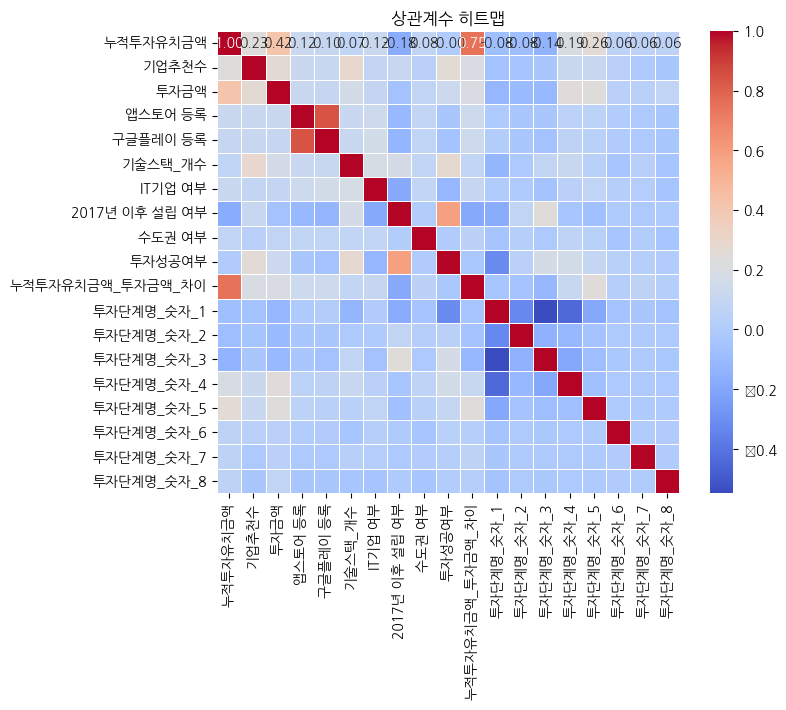

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib의 폰트 설정을 먼저 지정
plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 한글 폰트명

# 상관 행렬 생성
corr_matrix = df.corr()

# 히트맵 크기 조정
plt.figure(figsize=(8, 6))

# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, annot_kws={"size": 10})
plt.title('상관계수 히트맵')
plt.show()


In [8]:
print(corr_matrix)

                  누적투자유치금액     기업추천수      투자금액   앱스토어 등록  구글플레이 등록   기술스택_개수  \
누적투자유치금액          1.000000  0.232527  0.424755  0.120298  0.100463  0.073723   
기업추천수             0.232527  1.000000  0.266272  0.120448  0.109488  0.287534   
투자금액              0.424755  0.266272  1.000000  0.121235  0.103173  0.167794   
앱스토어 등록           0.120298  0.120448  0.121235  1.000000  0.841542  0.116783   
구글플레이 등록          0.100463  0.109488  0.103173  0.841542  1.000000  0.110209   
기술스택_개수           0.073723  0.287534  0.167794  0.116783  0.110209  1.000000   
IT기업 여부           0.123084  0.087004  0.091418  0.140362  0.160911  0.189328   
2017년 이후 설립 여부   -0.179038  0.105090 -0.062909 -0.108427 -0.126186  0.177495   
수도권 여부            0.075335  0.042042  0.078635  0.084899  0.070546  0.081850   
투자성공여부           -0.002260  0.257933  0.126697 -0.036432 -0.057395  0.278188   
누적투자유치금액_투자금액_차이  0.747252  0.199146  0.198597  0.139603  0.135862  0.082681   
투자단계명_숫자_1       -0.077240 -0.064012 -0.

## Feature Importances

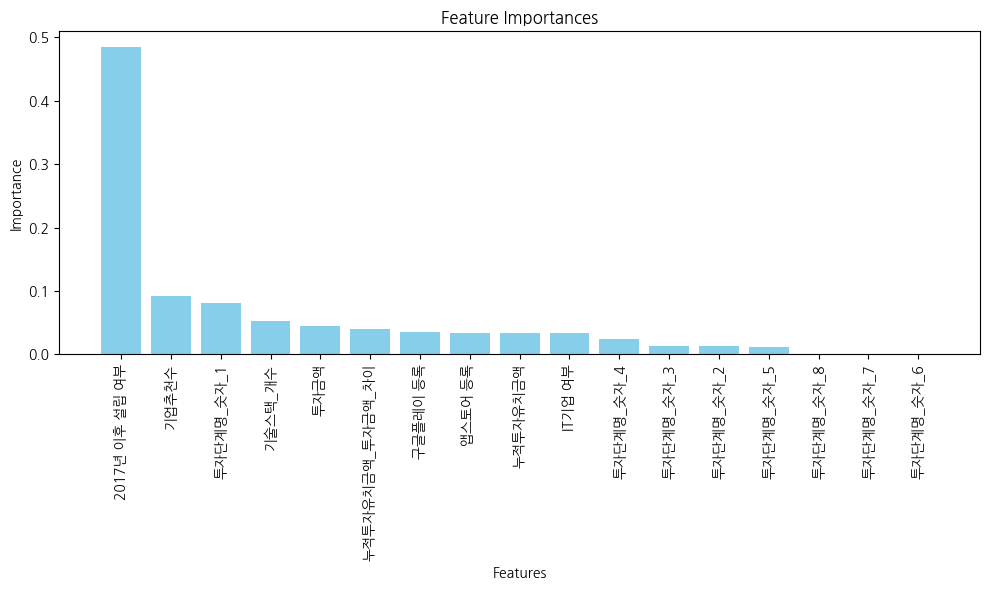

In [9]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = df['투자성공여부']

features = df[selected_features]

# 모델 생성 (Random Forest)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(features, target)

# 특징 중요도
importances = model_rf.feature_importances_

# 중요도 순으로 특징들을 정렬
indices = np.argsort(importances)[::-1]

# 특징 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(features.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Solution 1) Decision Tree

In [10]:
features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = '투자성공여부'

In [11]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree 모델 생성
dt_classifier = DecisionTreeClassifier()

# 모델 훈련
dt_classifier.fit(X_train, y_train)

# 예측
y_pred = dt_classifier.predict(X_test)

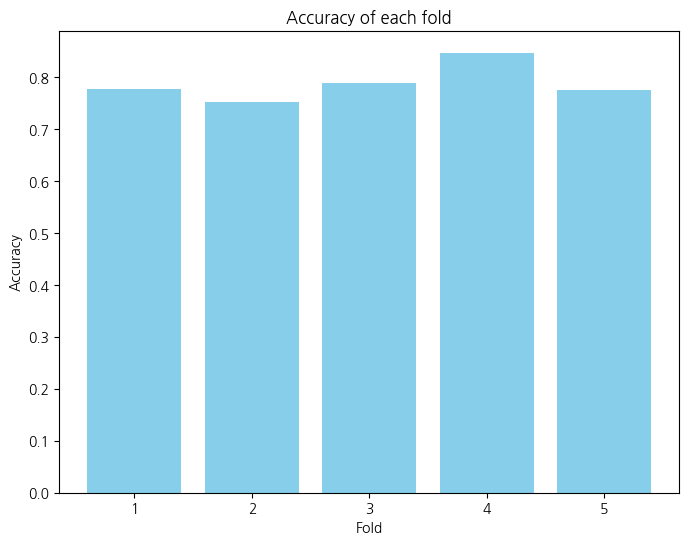

평균 정확도: 0.788010936431989


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# K-fold 교차 검증
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# 각 분할의 정확도를 그래프로 표시
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores)+1), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of each fold')
plt.show()

# 평균 정확도 출력
print("평균 정확도:", scores.mean())


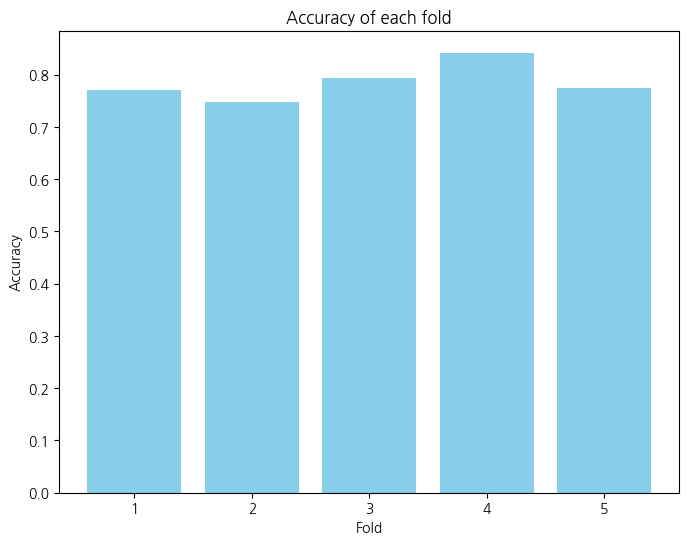

평균 정확도: 0.7861061745272272


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# K-fold 교차 검증
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# 각 분할의 정확도를 그래프로 표시
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores)+1), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of each fold')
plt.show()

# 평균 정확도 출력
print("평균 정확도:", scores.mean())


In [14]:

# 성능 평가
print("Accuracy:", dt_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8129770992366412
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       109
           1       0.88      0.79      0.83       153

    accuracy                           0.81       262
   macro avg       0.81      0.82      0.81       262
weighted avg       0.82      0.81      0.81       262

Confusion Matrix:
[[ 92  17]
 [ 32 121]]


In [15]:
from sklearn.model_selection import cross_val_score

# Decision Tree 모델 생성
dt_classifier = DecisionTreeClassifier()

# 5-fold 교차 검증 수행
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# 각 폴드에서의 정확도 출력
print("Cross-validation scores:", scores)

# 평균 정확도 계산
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.77619048 0.75714286 0.78947368 0.84210526 0.77511962]
Average accuracy: 0.7880063795853269


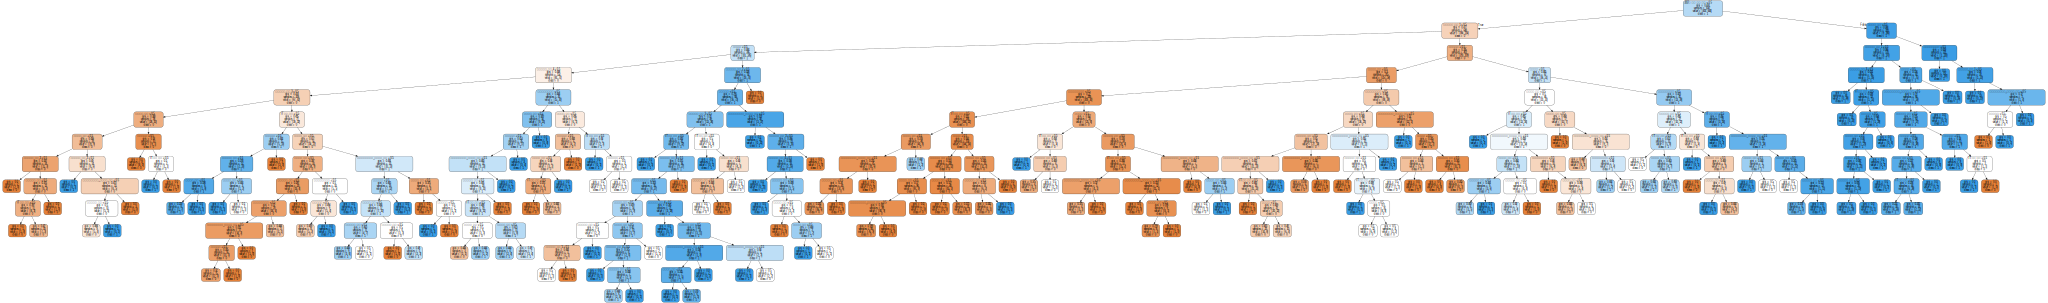

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydot

# Decision Tree 모델 생성
dt_classifier = DecisionTreeClassifier()

# 모델 훈련
dt_classifier.fit(X_train, y_train)

# 예측
y_pred = dt_classifier.predict(X_test)

# 결정 트리 시각화
export_graphviz(dt_classifier, out_file='tree.dot', 
                feature_names=X_train.columns,  
                class_names=['0', '1'],
                filled=True, rounded=True,
                special_characters=True)

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

graph

### 클래스 0
#### 정확도는 80.15%로 전체 데이터 중 모델이 올바르게 예측한 비율로, 262개 샘플 중 약 80.15%를 정확히 예측하였음
#### 정밀도는 75%로 모델이 클래스 0으로 예측한 샘플 중 실제로 클래스 0인 비율
#### 재현율은 79%로 모델이 올바르게 클래스 0으로 예측한 비율
#### F1-Score는 정밀도와 재현율의 조화 평균
### 클래스 1
#### 정밀도는 84%로 클래스 1으로 예측한 샘플 중 실제로 클래스 1인 비율
#### 재현율은 81%로 클래스 1인 샘플 중 모델이 올바르게 클래스 1로 예측한 비율
#### F1-Score는 83%
## Confusion Matrix
### 클래스 0
#### 실제 클래스 0인 109개 샘플 중 86개를 올바르게 클래스 0 으로 예측
#### 23개를 클래스 1로 예측
### 클래스 1
#### 실제 클래스 1인 153개 샘플 중 124개를 올바르게 클래스 1로 예측
#### 29개를 클래스 0으로 예측


## Solution 2) RandomForest

In [17]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = '투자성공여부'

In [18]:
df.head()

,누적투자유치금액,기업추천수,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자_1,투자단계명_숫자_2,투자단계명_숫자_3,투자단계명_숫자_4,투자단계명_숫자_5,투자단계명_숫자_6,투자단계명_숫자_7,투자단계명_숫자_8
0,0,0,0,0,1,0,1,0,1,0,0,True,False,False,False,False,False,False,False
1,1,1,1,1,1,1,1,0,1,1,1,False,False,False,False,True,False,False,False
2,0,0,1,0,0,1,1,0,1,1,0,True,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,1,1,1,0,False,True,False,False,False,False,False,False
4,0,0,0,0,0,0,1,0,1,1,0,False,False,False,True,False,False,False,False


In [19]:
X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

Ft_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
Ft_classifier.fit(X_train, y_train)

# 예측
y_pred = Ft_classifier.predict(X_test)

# 성능 평가
print("Accuracy:", Ft_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8091603053435115
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       109
           1       0.85      0.82      0.83       153

    accuracy                           0.81       262
   macro avg       0.80      0.81      0.80       262
weighted avg       0.81      0.81      0.81       262

Confusion Matrix:
[[ 86  23]
 [ 27 126]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 0.7, 1: 0.3}
best_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0, class_weight=class_weights)

# 최적의 모델로 훈련
best_classifier.fit(X_train, y_train)

# 예측
y_pred = best_classifier.predict(X_test)

print("Accuracy:", best_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7977099236641222
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       109
           1       0.91      0.73      0.81       153

    accuracy                           0.80       262
   macro avg       0.80      0.81      0.80       262
weighted avg       0.82      0.80      0.80       262

Confusion Matrix:
[[ 98  11]
 [ 42 111]]


In [24]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 적용 (2개의 주성분으로 변환)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [25]:
X_train_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])

# 랜덤 포레스트 모델 생성
class_weights = {0: 0.7, 1: 0.3}
best_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0, class_weight=class_weights)

# 최적의 모델로 훈련
best_classifier.fit(X_train_pca, y_train)

# 예측
y_pred = best_classifier.predict(X_test_pca)


In [26]:
print("Accuracy:", best_classifier.score(X_test_pca, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7709923664122137
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       109
           1       0.89      0.69      0.78       153

    accuracy                           0.77       262
   macro avg       0.78      0.79      0.77       262
weighted avg       0.80      0.77      0.77       262

Confusion Matrix:
[[ 96  13]
 [ 47 106]]


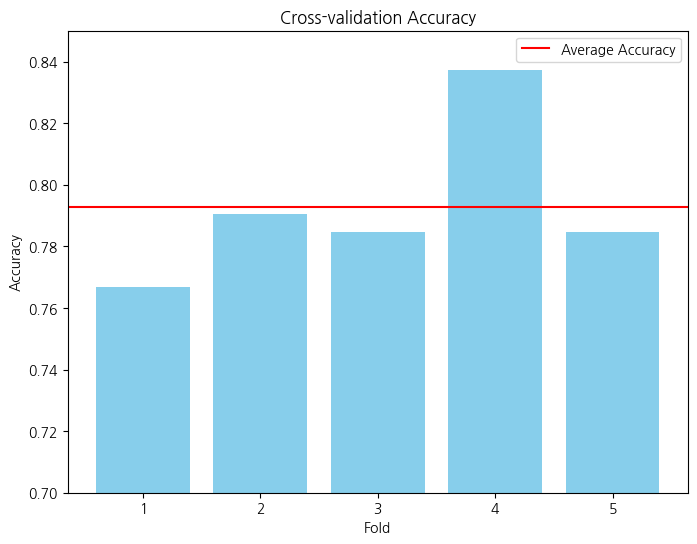

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(best_classifier, X_train_pca, y_train, cv=5)

# 교차 검증 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy')
plt.ylim([0.7, 0.85])  # 정확도 범위를 조정하여 더 잘 보이도록 함
plt.axhline(y=np.mean(cross_val_scores), color='r', linestyle='-', label='Average Accuracy')
plt.legend()
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ft_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
Ft_classifier.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터에서의 정확도 평가
train_accuracy = Ft_classifier.score(X_train, y_train)
test_accuracy = Ft_classifier.score(X_test, y_test)

# 결과 출력
print("훈련 데이터 정확도:", train_accuracy)
print("테스트 데이터 정확도:", test_accuracy)

# 과적합 여부 판단
if train_accuracy > 0.8 and (train_accuracy - test_accuracy) > 0.05:
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")


훈련 데이터 정확도: 0.8720152817574021
테스트 데이터 정확도: 0.8091603053435115
모델이 과적합되었습니다.


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# 나머지 코드는 이어서 실행합니다


# Random Forest 모델 생성
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0)

# Gradient Boosting 모델 생성
gb_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=0)

# 앙상블 모델 생성
ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)], voting='soft')

# 훈련 데이터로 앙상블 모델 학습
ensemble_classifier.fit(X_train_pca, y_train)

# 테스트 데이터로 앙상블 모델 평가
y_pred = ensemble_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)

print("테스트 데이터 정확도:", test_accuracy)


테스트 데이터 정확도: 0.7862595419847328


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 데이터와 테스트 데이터 분리
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

# 앙상블 모델로 훈련 데이터 학습
ensemble_classifier.fit(X_train_split, y_train_split)

# 훈련 데이터와 테스트 데이터에서의 정확도 평가
train_accuracy = ensemble_classifier.score(X_train_split, y_train_split)
test_accuracy = ensemble_classifier.score(X_test_split, y_test_split)

# 결과 출력
print("훈련 데이터 정확도:", train_accuracy)
print("테스트 데이터 정확도:", test_accuracy)

# 과적합 여부 판단
if train_accuracy > 0.8 and (train_accuracy - test_accuracy) > 0.05:
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")


훈련 데이터 정확도: 0.8548233046800382
테스트 데이터 정확도: 0.8206106870229007
모델이 과적합되지 않았습니다.


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

ValueError: num must be an integer with 1 <= num <= 15, not 16

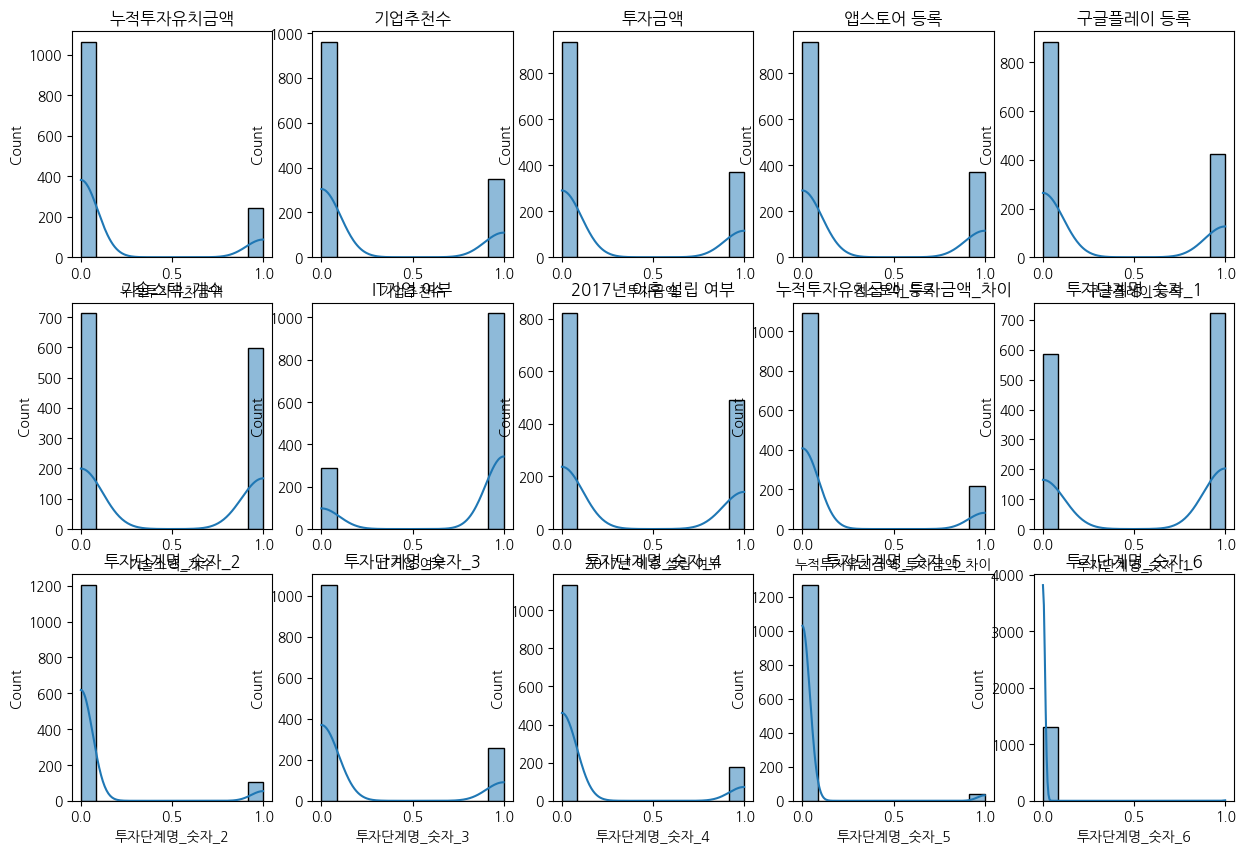

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 특성의 분포 시각화
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 준비
# X와 y는 각각 특성과 타겟을 나타냅니다.
# 이 데이터는 사용자의 신용평가에 관한 것이라고 가정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 모델 학습
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 모델 평가
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# 예측을 위해 주성분 데이터 사용
X_train_pca = pca.transform(X_train_resampled)

# 시각화를 위한 코드
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title("결정 경계 시각화")
plot_decision_boundaries(X_train_pca, y_train_resampled, rf_classifier, ax)
plt.show()


In [ ]:
# 예측을 위해 주성분 데이터 사용
X_train_pca = pca.transform(X_train_resampled)

# 시각화를 위한 코드
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title("결정 경계 시각화")
plot_decision_boundaries(X_train_pca, y_train_resampled, rf_classifier, ax)
plt.show()


In [ ]:
def plot_decision_boundaries(X, y, classifier, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], alpha=0.8, label=cl, edgecolor='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper left')

# 시각화를 위한 코드
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title("결정경계 시각화")
plot_decision_boundaries(X_train_pca.values, y_train.values, best_classifier, ax)
plt.show()

In [ ]:
# 예측을 위해 주성분 데이터 사용
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 앙상블 모델로 훈련 데이터 학습
ensemble_classifier.fit(X_train_pca, y_train)

# 시각화를 위한 코드
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title("결정 경계 시각화")
plot_decision_boundaries(X_train_pca, y_train.values, ensemble_classifier, ax)
plt.show()


In [ ]:
feature_logistics = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target_logistic = '투자성공여부'

In [ ]:
X = df[feature_logistics]
y = df[target_logistic]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8053435114503816
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       109
           1       0.84      0.82      0.83       153

    accuracy                           0.81       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262

Confusion Matrix:
[[ 86  23]
 [ 28 125]]


In [33]:
# 훈련 데이터의 정확도 계산
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# 테스트 데이터의 정확도 계산
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# 정확도 차이 계산
accuracy_diff = train_accuracy - test_accuracy
print("Accuracy Difference:", accuracy_diff)


Train Accuracy: 0.830945558739255
Test Accuracy: 0.8053435114503816
Accuracy Difference: 0.025602047288873386


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 데이터 전처리를 위한 파이프라인 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 스케일링
    # 이상치 처리, 필요한 경우 추가
])

# 훈련 데이터에 파이프라인 적용
X_train_processed = pipeline.fit_transform(X_train)

# 테스트 데이터에 파이프라인 적용
X_test_processed = pipeline.transform(X_test)

In [35]:
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test_processed)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8015267175572519
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       109
           1       0.84      0.81      0.83       153

    accuracy                           0.80       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.80      0.80      0.80       262

Confusion Matrix:
[[ 86  23]
 [ 29 124]]


In [36]:
# 훈련 데이터의 정확도 계산
train_accuracy = accuracy_score(y_train, model.predict(X_train_processed))
print("Train Accuracy:", train_accuracy)

# 테스트 데이터의 정확도 계산
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# 정확도 차이 계산
accuracy_diff = train_accuracy - test_accuracy
print("Accuracy Difference:", accuracy_diff)


Train Accuracy: 0.830945558739255
Test Accuracy: 0.8015267175572519
Accuracy Difference: 0.029418841182003108


In [37]:
from sklearn.model_selection import cross_val_score

# 5-폴드 교차 검증 수행
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5)

# 교차 검증 정확도 평균 및 표준 편차 계산
mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

print("Cross-Validation Mean Accuracy:", mean_cv_accuracy)
print("Cross-Validation Accuracy Standard Deviation:", std_cv_accuracy)


Cross-Validation Mean Accuracy: 0.8214262930052405
Cross-Validation Accuracy Standard Deviation: 0.023480620366241867


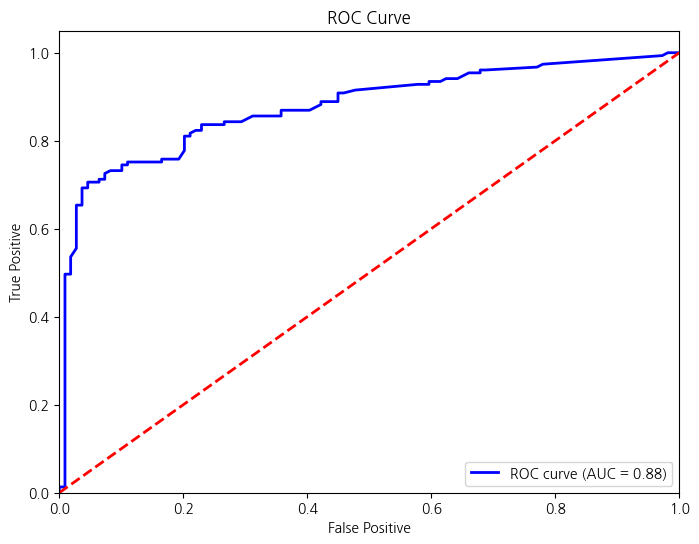

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률 계산
y_prob = model.predict_proba(X_test_processed)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
auc = roc_auc_score(y_test, y_prob)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# 하이퍼파라미터 분포 생성
param_dist = {'C': uniform(loc=0, scale=100)}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(model, param_dist, cv=5, scoring='accuracy', n_iter=10)

# 랜덤 서치 수행
random_search.fit(X_train_processed, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 테스트 데이터에 대해 예측 수행
y_pred = random_search.predict(X_test_processed)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 2.0088441155168613}
Accuracy: 0.8015267175572519


교차 검증 정확도:  [0.77619048 0.74285714 0.79425837 0.84210526 0.77511962]
교차 검증 평균 정확도:  0.7861061745272272
훈련 데이터 정확도:  0.8806112702960841
테스트 데이터 정확도:  0.8206106870229007
모델이 과적합되지 않았습니다.


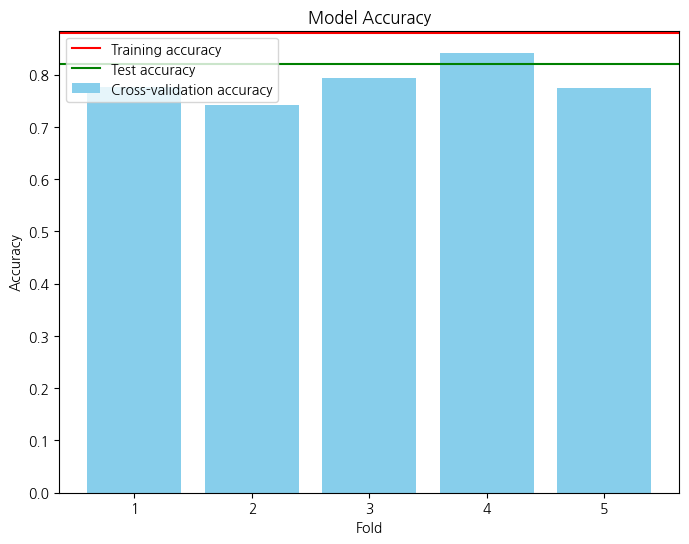

In [40]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
dt_classifier = DecisionTreeClassifier(random_state=42)

# 교차 검증을 통한 훈련 데이터 정확도 평가
cross_val_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# 모델 훈련
dt_classifier.fit(X_train, y_train)

# 테스트 데이터에서의 정확도 평가
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 결과 출력
print("교차 검증 정확도: ", cross_val_scores)
print("교차 검증 평균 정확도: ", np.mean(cross_val_scores))
print("훈련 데이터 정확도: ", train_accuracy)
print("테스트 데이터 정확도: ", test_accuracy)

# 과적합 여부 판단
if train_accuracy > np.mean(cross_val_scores) and test_accuracy < np.mean(cross_val_scores):
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores, color='skyblue', label='Cross-validation accuracy')
plt.axhline(y=train_accuracy, color='r', linestyle='-', label='Training accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='-', label='Test accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [155]:
simulation_df = pd.read_csv("기업정보.csv", encoding='cp949')

In [156]:
simulation_df.head()

,기업일련번호,업체국문명,업체영문명,기업한줄소개내용,기업소개상세내용,설립일자,구성원수,누적투자유치금액,홈페이지url,소셜미디어url,기업추천수,기업추천내용,산업구분명,사무실주소,기술스택명,발행사명,보도일자,뉴스제목명,기사url
0,161069,코뿔소랩,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116057,현대제이콤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161065,지티투자개발,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161066,동성아트홀,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161072,오픈부스,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
columns_to_drop = ['업체국문명', '업체영문명', '기업한줄소개내용', '구성원수', '홈페이지url', '소셜미디어url', '기업추천내용', '발행사명', '보도일자', '뉴스제목명', '기사url']

In [158]:
simulation_df.drop(columns=columns_to_drop, inplace=True)

In [159]:
simulation_df.head()

,기업일련번호,기업소개상세내용,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명
0,161069,NaN,NaN,NaN,0,NaN,NaN,NaN
1,116057,NaN,NaN,NaN,0,NaN,NaN,NaN
2,161065,NaN,NaN,NaN,0,NaN,NaN,NaN
3,161066,NaN,NaN,NaN,0,NaN,NaN,NaN
4,161072,NaN,NaN,NaN,0,NaN,NaN,NaN


In [160]:
simulation_df.shape

(63219, 8)

In [161]:
#selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']

In [162]:
simulation_service_df = pd.read_csv("서비스.csv", encoding='cp949')
simulation_invest_df = pd.read_csv("투자유치.csv", encoding='cp949')

In [163]:
simulation_service_df.head()

,제품일련번호,기업일련번호,제품국문명,제품영문명,한줄소개내용,제품상세설명,검색태그내용,홈페이지url,앱스토어url,구글플레이url
0,128308,158214,Zi성,ZiSeong,펀딩플랫폼 브랜드 아이덴티티 작업 진행,/hadoop/tstream/csv_data/RK/csv_tb_rk_srvc_prd...,NaN,NaN,NaN,NaN
1,128309,158214,슈퍼게임즈,SuperGames,게이머 게임 매칭 플랫폼,/hadoop/tstream/csv_data/RK/csv_tb_rk_srvc_prd...,NaN,NaN,NaN,NaN
2,128234,160540,홍영의대게백간장,NaN,영덕 특산물 대게를 활용한 투명한 백간장,/hadoop/tstream/csv_data/RK/csv_tb_rk_srvc_prd...,NaN,NaN,NaN,NaN
3,128262,161009,딥세일즈,DeepSales,신규 바이어 발굴 서비스,/hadoop/tstream/csv_data/RK/csv_tb_rk_srvc_prd...,앱/웹서비스,NaN,NaN,NaN
4,128292,156828,파이널매치,Final Match,인터넷 투자취업 플랫폼,/hadoop/tstream/csv_data/RK/csv_tb_rk_srvc_prd...,NaN,http://www.finalmatch.co.kr/,NaN,NaN


In [164]:
columns_to_drop = ['제품국문명', '제품일련번호', '한줄소개내용', '제품영문명', '제품상세설명', '검색태그내용']
simulation_service_df.drop(columns=columns_to_drop, inplace=True)

In [165]:
simulation_service_df.drop(columns='홈페이지url', inplace=True)

In [166]:
simulation_service_df.head()

,기업일련번호,앱스토어url,구글플레이url
0,158214,NaN,NaN
1,158214,NaN,NaN
2,160540,NaN,NaN
3,161009,NaN,NaN
4,156828,NaN,NaN


In [167]:
simulation_invest_df.head()

,투자일련번호,기업일련번호,투자일자,투자단계명,투자금액,기업가치금액,투자유치비고,보도자료발행사명,보도자료제목,보도자료url,투자기관번호
0,9671,160766,20210901,Angel,100000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9670,154119,20211122,투자 단계 비공개,NaN,NaN,NaN,인더스트리뉴스,아이온커뮤니케이션즈|| 위드싸인 본부 분사 ‘이폼웍스’ 설립… 카카오에서 투자 유치...,http://www.industrynews.co.kr/news/articleView...,114448||33862
2,9672,152207,20211027,Seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9673,152207,20211018,Seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9674,110561,20210801,Seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
columns_to_drop = ['투자일련번호', '투자일자', '기업가치금액', '투자유치비고', '보도자료발행사명', '보도자료제목', '보도자료url', '투자기관번호']
simulation_invest_df.drop(columns=columns_to_drop, inplace=True)

In [169]:
simulation_invest_df.head()

,기업일련번호,투자단계명,투자금액
0,160766,Angel,100000000.0
1,154119,투자 단계 비공개,NaN
2,152207,Seed,NaN
3,152207,Seed,NaN
4,110561,Seed,NaN


In [170]:
df_merged = pd.merge(simulation_df, simulation_service_df, on='기업일련번호', how='left')
df_merged.head()

,기업일련번호,기업소개상세내용,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url
0,161069,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,116057,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,161065,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,161066,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,161072,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [171]:
df_merged.shape

(67011, 10)

In [268]:
simulation_data = pd.merge(df_merged, simulation_invest_df, on='기업일련번호', how='left')

In [269]:
simulation_data.head()

,기업일련번호,기업소개상세내용,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,투자금액
0,161069,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116057,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161065,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161066,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161072,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
simulation_data.shape

(72319, 12)

In [271]:
simulation_data.drop(columns='기업소개상세내용', inplace=True)

In [272]:
simulation_data.isnull().sum()

기업일련번호          0
설립일자        44848
누적투자유치금액    65041
기업추천수           0
산업구분명       42098
사무실주소       52820
기술스택명       59755
앱스토어url     69047
구글플레이url    68305
투자단계명       61943
투자금액        66063
dtype: int64

In [273]:
def convert_founding_date(date):
    if pd.isna(date):
        return 0
    date = pd.to_datetime(date, errors='coerce')
    return 1 if date and date.year >= 2017 else 0

simulation_data['설립일자'] = simulation_data['설립일자'].apply(convert_founding_date)

In [274]:
simulation_data.head()

,기업일련번호,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,투자금액
0,161069,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116057,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161065,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161066,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161072,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
simulation_data['누적투자금액_투자금액_차이'] = simulation_data['누적투자유치금액'] - simulation_data['투자금액']

In [276]:
# 누적투자금액과 투자금액의 차이에 대한 조건을 충족하는지 확인하여 0 또는 1로 변환하는 함수 정의
def convert_investment_difference(diff):
    if pd.isna(diff) or diff <= 0:
        return 0
    else:
        return 1

# 변환 함수를 적용하여 새로운 값으로 누적투자금액_투자금액_차이 열 업데이트
simulation_data['누적투자금액_투자금액_차이'] = simulation_data['누적투자금액_투자금액_차이'].apply(convert_investment_difference)


In [277]:
mean_investment = df['누적투자유치금액'].mean()

def convert_investment(amount):
    if pd.isna(amount) or amount < mean_investment:
        return 0
    return 1

simulation_data['누적투자유치금액'] = simulation_data['누적투자유치금액'].apply(convert_investment)

In [278]:
def convert_office_address(address):
    if pd.isna(address) or not isinstance(address, str):
        return 0
    return 1 if '경기' in address or '서울' in address else 0

simulation_data['사무실주소'] = simulation_data['사무실주소'].apply(convert_office_address)

In [279]:
simulation_data['앱스토어url'] = simulation_data['앱스토어url'].apply(lambda x: 0 if pd.isna(x) else 1)
simulation_data['구글플레이url'] = simulation_data['구글플레이url'].apply(lambda x: 0 if pd.isna(x) else 1)

In [280]:
simulation_data['투자단계명'].unique()

array([nan, '투자 단계 비공개', 'Seed', 'Angel', 'Series A', 'Series B', '해당없음',
       'Series C', 'Pre-IPO', 'Series D'], dtype=object)

In [281]:
invest_stage_rank = {
    'Seed': 2,
    'Angel': 3,
    'Series A': 4,
    'Series B': 5,
    'Series C': 6,
    'Series D': 7,
    'Pre-IPO': 8,
    '해당없음': 0,
    '투자 단계 비공개': 1,
    np.nan: 0
}

# 투자 단계명을 랭크로 변환하는 함수 정의
def convert_invest_stage(stage):
    return invest_stage_rank[stage]

# 투자 단계명을 랭크로 변환하여 새로운 칼럼에 저장
simulation_data['투자단계명'] = simulation_data['투자단계명'].apply(convert_invest_stage)


In [282]:
# 더미 변수화
invest_stage_dummies = pd.get_dummies(simulation_data['투자단계명'], prefix='투자단계')

# 기존 데이터프레임에 더미 변수 추가
simulation_data = pd.concat([simulation_data, invest_stage_dummies], axis=1)

# 결과 확인
simulation_data.head()


,기업일련번호,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,...,누적투자금액_투자금액_차이,투자단계_0,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8
0,161069,0,0,0,NaN,0,NaN,0,0,0,...,0,True,False,False,False,False,False,False,False,False
1,116057,0,0,0,NaN,0,NaN,0,0,0,...,0,True,False,False,False,False,False,False,False,False
2,161065,0,0,0,NaN,0,NaN,0,0,0,...,0,True,False,False,False,False,False,False,False,False
3,161066,0,0,0,NaN,0,NaN,0,0,0,...,0,True,False,False,False,False,False,False,False,False
4,161072,0,0,0,NaN,0,NaN,0,0,0,...,0,True,False,False,False,False,False,False,False,False


In [283]:
simulation_data['산업구분명'].unique()

array([nan, '교육/이러닝||프로그래밍교육||기업교육||직무교육||정보보안교육', '온라인쇼핑', ...,
       '마케팅||상품개발/상품기획/디자인/제조||브랜드',
       '건강/의료/제약/바이오||바이오||화학||의약품||바이오/질병진단',
       '소프트웨어||클라우드||렌더링||pricing||분산병렬'], dtype=object)

In [284]:
# 각 인스턴스에서 기술 스택 단어 수를 세는 함수 정의
def count_technologies(tech_stack):
    if pd.isna(tech_stack):
        return 0
    else:
        return len(tech_stack.split('||'))

# 기술 스택 단어 수를 새로운 칼럼에 저장
simulation_data['기술스택_개수'] = simulation_data['기술스택명'].apply(count_technologies)

# 결과 확인
simulation_data.head()


,기업일련번호,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,...,투자단계_0,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8,기술스택_개수
0,161069,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
1,116057,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
2,161065,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
3,161066,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
4,161072,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0


In [285]:
simulation_data.head()

,기업일련번호,설립일자,누적투자유치금액,기업추천수,산업구분명,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,...,투자단계_0,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8,기술스택_개수
0,161069,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
1,116057,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
2,161065,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
3,161066,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0
4,161072,0,0,0,NaN,0,NaN,0,0,0,...,True,False,False,False,False,False,False,False,False,0


In [286]:
mean_investment_amount = simulation_data['투자금액'].mean()

# 투자금액을 평균보다 큰지 여부에 따라 1 또는 0으로 변환하는 함수 정의
def convert_investment_amount(investment):
    if pd.isna(investment) or investment <= mean_investment_amount:
        return 0
    else:
        return 1

# 변환 함수를 적용하여 새로운 값으로 투자금액 열 업데이트
simulation_data['투자금액'] = simulation_data['투자금액'].apply(convert_investment_amount)

In [287]:
# 산업구분명을 기반으로 IT기업 여부를 판단하는 함수 정의
def is_IT_company(industry):
    if pd.isna(industry):
        return 0
    elif ('소프트웨어' in industry or '데이터' in industry or '인공지능' in industry or 'Clud' in industry or '서버' in industry or '웹' in industry or '모바일' in industry or 'AI' in industry or 'AR' in industry or 'Unity' in industry or 'c#' in industry or '솔루션' in industry or 'mobile' in industry or 'platform' in industry or 'IT'):
        return 1
    else:
        return 0

# 변환 함수를 적용하여 새로운 컬럼 생성
simulation_data['IT기업여부'] = simulation_data['산업구분명'].apply(is_IT_company)

# 결과 확인



In [288]:
simulation_data.drop(columns='산업구분명', inplace=True)

In [289]:
simulation_data.head()

,기업일련번호,설립일자,누적투자유치금액,기업추천수,사무실주소,기술스택명,앱스토어url,구글플레이url,투자단계명,투자금액,...,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8,기술스택_개수,IT기업여부
0,161069,0,0,0,0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,0,0
1,116057,0,0,0,0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,0,0
2,161065,0,0,0,0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,0,0
3,161066,0,0,0,0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,0,0
4,161072,0,0,0,0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,0,0


In [290]:
simulation_data.isnull().sum()

기업일련번호                0
설립일자                  0
누적투자유치금액              0
기업추천수                 0
사무실주소                 0
기술스택명             59755
앱스토어url               0
구글플레이url              0
투자단계명                 0
투자금액                  0
누적투자금액_투자금액_차이        0
투자단계_0                0
투자단계_1                0
투자단계_2                0
투자단계_3                0
투자단계_4                0
투자단계_5                0
투자단계_6                0
투자단계_7                0
투자단계_8                0
기술스택_개수               0
IT기업여부                0
dtype: int64

In [291]:
simulation_data.drop(columns='투자단계명', inplace=True)

In [292]:
simulation_data.drop(columns='기술스택명', inplace=True)

In [293]:
simulation_data.head()

,기업일련번호,설립일자,누적투자유치금액,기업추천수,사무실주소,앱스토어url,구글플레이url,투자금액,누적투자금액_투자금액_차이,투자단계_0,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8,기술스택_개수,IT기업여부
0,161069,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
1,116057,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
2,161065,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
3,161066,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
4,161072,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0


In [294]:
# 컬럼 이름 변경
simulation_data.rename(columns={'설립일자': '2017년 이후 설립 여부',
                               '사무실주소': '수도권 여부',
                               '앱스토어url': '앱스토어 등록',
                               '구글플레이url': '구글플레이 등록',
                               '투자단계': '투자단계명_숫자'}, inplace=True)



In [295]:
simulation_data.head()

,기업일련번호,2017년 이후 설립 여부,누적투자유치금액,기업추천수,수도권 여부,앱스토어 등록,구글플레이 등록,투자금액,누적투자금액_투자금액_차이,투자단계_0,투자단계_1,투자단계_2,투자단계_3,투자단계_4,투자단계_5,투자단계_6,투자단계_7,투자단계_8,기술스택_개수,IT기업여부
0,161069,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
1,116057,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
2,161065,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
3,161066,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0
4,161072,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,0,0


In [296]:
simulation_data.drop(columns='기업일련번호', inplace=True)

In [297]:
simulation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72319 entries, 0 to 72318
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   2017년 이후 설립 여부  72319 non-null  int64
 1   누적투자유치금액        72319 non-null  int64
 2   기업추천수           72319 non-null  int64
 3   수도권 여부          72319 non-null  int64
 4   앱스토어 등록         72319 non-null  int64
 5   구글플레이 등록        72319 non-null  int64
 6   투자금액            72319 non-null  int64
 7   누적투자금액_투자금액_차이  72319 non-null  int64
 8   투자단계_0          72319 non-null  bool 
 9   투자단계_1          72319 non-null  bool 
 10  투자단계_2          72319 non-null  bool 
 11  투자단계_3          72319 non-null  bool 
 12  투자단계_4          72319 non-null  bool 
 13  투자단계_5          72319 non-null  bool 
 14  투자단계_6          72319 non-null  bool 
 15  투자단계_7          72319 non-null  bool 
 16  투자단계_8          72319 non-null  bool 
 17  기술스택_개수         72319 non-null  int64
 18  IT기업여부          72319 non-

In [298]:
# 시뮬레이션 데이터프레임의 칼럼 이름 수정
simulation_data.rename(columns={
    '2017년 이후 설립 여부': '2017년 이후 설립 여부',
    '누적투자유치금액': '누적투자유치금액',
    '기업추천수': '기업추천수',
    '수도권 여부': '수도권 여부',
    '앱스토어 등록': '앱스토어 등록',
    '구글플레이 등록': '구글플레이 등록',
    '투자금액': '투자금액',
    '누적투자금액_투자금액_차이': '누적투자유치금액_투자금액_차이',
    '투자단계_1': '투자단계명_숫자_1',
    '투자단계_2': '투자단계명_숫자_2',
    '투자단계_3': '투자단계명_숫자_3',
    '투자단계_4': '투자단계명_숫자_4',
    '투자단계_5': '투자단계명_숫자_5',
    '투자단계_6': '투자단계명_숫자_6',
    '투자단계_7': '투자단계명_숫자_7',
    '투자단계_8': '투자단계명_숫자_8',
    'IT기업여부': 'IT기업 여부'
}, inplace=True)



In [301]:

simulation_data.drop(columns=['수도권 여부'], inplace=True)

# X_sim 생성
X_sim = simulation_data[['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록',
                         '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부',
                         '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2',
                         '투자단계명_숫자_3', '투자단계명_숫자_4', '투자단계명_숫자_5',
                         '투자단계명_숫자_6', '투자단계명_숫자_7', '투자단계명_숫자_8']]

In [304]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# 모델 학습
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 모델 평가
y_pred_sim = rf_classifier.predict(X_sim)



In [303]:
y_pred_sim

array([0, 0, 0, ..., 1, 0, 0])

In [308]:
import numpy as np

print(y_pred_sim[:200])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0]


In [310]:
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)

# 랜덤하게 5000개의 샘플 선택
random_indices = np.random.choice(len(y_pred_sim), size=5000, replace=False)

# 선택된 샘플에 대한 예측 값 확인
selected_predictions = y_pred_sim[random_indices]

# 투자 유치 성공 여부 기준으로 카운트
success_count = np.count_nonzero(selected_predictions == 1)
failure_count = np.count_nonzero(selected_predictions == 0)

print("투자 유치 성공: ", success_count)
print("투자 유치 실패: ", failure_count)


투자 유치 성공:  576
투자 유치 실패:  4424


In [313]:
import numpy as np

# 테스트를 5번 반복
for i in range(5):
    print(f"테스트 {i+1}")

    # 랜덤 시드 설정
    np.random.seed(i)

    # 랜덤하게 5000개의 샘플 선택
    random_indices = np.random.choice(len(y_pred_sim), size=5000, replace=False)

    # 선택된 샘플에 대한 예측 값 확인
    selected_predictions = y_pred_sim[random_indices]

    # 투자 유치 성공 여부 기준으로 카운트
    success_count = np.count_nonzero(selected_predictions == 1)
    failure_count = np.count_nonzero(selected_predictions == 0)

    print("투자 유치 성공: ", success_count)
    print("투자 유치 실패: ", failure_count)
    print()


테스트 1
투자 유치 성공:  618
투자 유치 실패:  4382

테스트 2
투자 유치 성공:  634
투자 유치 실패:  4366

테스트 3
투자 유치 성공:  581
투자 유치 실패:  4419

테스트 4
투자 유치 성공:  607
투자 유치 실패:  4393

테스트 5
투자 유치 성공:  629
투자 유치 실패:  4371



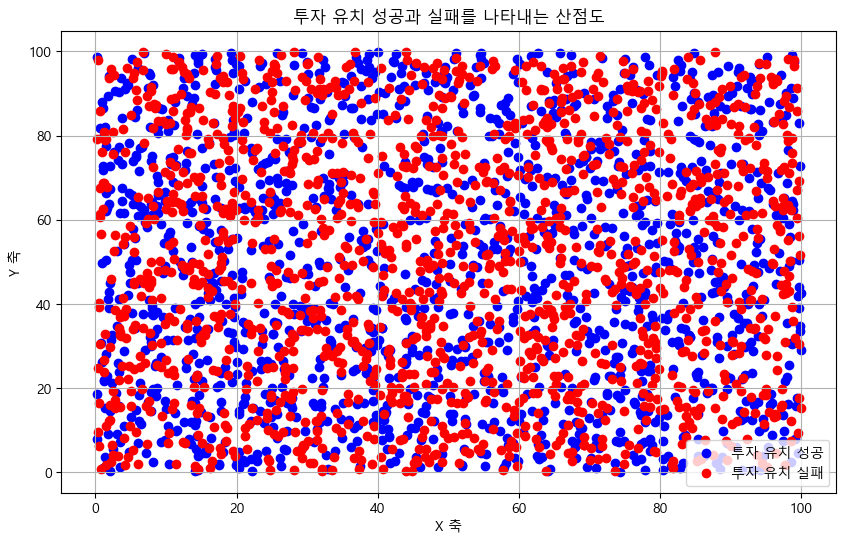

In [315]:
import matplotlib.pyplot as plt
import numpy as np

# 예측 결과 (테스트 데이터의 예측 결과로 대체)
y_pred_sim = np.random.randint(2, size=3000)  # 무작위로 생성된 예측 결과

# 산점도로 표시할 데이터 생성
success_indices = np.where(y_pred_sim == 1)[0]
failure_indices = np.where(y_pred_sim == 0)[0]

success_data = np.random.rand(len(success_indices), 2) * 100  # 무작위 데이터 생성
failure_data = np.random.rand(len(failure_indices), 2) * 100  # 무작위 데이터 생성

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(success_data[:, 0], success_data[:, 1], color='blue', label='투자 유치 성공')
plt.scatter(failure_data[:, 0], failure_data[:, 1], color='red', label='투자 유치 실패')

plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('투자 유치 성공과 실패를 나타내는 산점도')
plt.legend()
plt.grid(True)
plt.show()
